In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.11.csv')

# Учтите, что sort_by_list, cols2drop, columns_order_list в тестовой системе будут иметь другие значения.
sort_by_list = ['car_rating', 'riders']
cols2drop = ['random_name_1', 'target_reg', 'target_class', 'random_name_2']
columns_order_list = ['model', 'car_type', 'car_id', 'car_rating', 'year_to_start', 'year_to_work', 'riders', 'fuel_type']
critical_car_rating = 2

# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_11_ans.csv', index_col=0)

In [ ]:
df.columns

Index(['car_id', 'model', 'car_type', 'fuel_type', 'car_rating',
       'year_to_start', 'riders', 'year_to_work', 'target_reg',
       'target_class'],
      dtype='object')

In [ ]:
df.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,s-9164758n,Renault Kaptur,standart,petrol,3.76,2012,31867,2018,35.622685,engine_overheat
1,I-7194770x,Smart ForTwo,economy,petrol,4.08,2014,55325,2015,30.378960,electro_bug
2,k63904133P,Smart ForFour,economy,petrol,4.54,2015,76585,2018,64.757579,another_bug
3,H-4546747T,Kia Rio X,economy,petrol,4.68,2015,73109,2017,47.623089,engine_check
4,i-4390733F,Mini Cooper,business,petrol,4.96,2012,1007,2018,81.469055,engine_check


In [ ]:
df = df.sort_values(by=sort_by_list, ascending=[False, True])

In [ ]:
df = df.drop(columns=cols2drop, errors='ignore')

In [ ]:
df = df[columns_order_list]

In [ ]:
df = df.query(f"car_rating >= {critical_car_rating}")

In [ ]:
df = df.query("riders <= 10000 and car_type not in ['standart', 'economy']")

In [ ]:
df

,model,car_type,car_id,car_rating,year_to_start,year_to_work,riders,fuel_type
4,Mini Cooper,business,i-4390733F,4.96,2012,2018,1007,petrol
295,Mini Cooper,business,b34607341j,4.04,2011,2018,2740,petrol


In [ ]:
ans

,model,car_type,car_id,car_rating,year_to_start,year_to_work,riders,fuel_type
4,Mini Cooper,business,i-4390733F,4.96,2012,2018,1007,petrol
295,Mini Cooper,business,b34607341j,4.04,2011,2018,2740,petrol


In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_12.csv')

# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_12_ans.csv')

In [ ]:
df.head()

,Unnamed: 0,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,0,o-1588203t,VW Polo VI,economy,petrol,4.04,2014,61872,2015,46.175419,engine_check
1,1,B-1760099A,Renault Kaptur,standart,petrol,4.36,2015,95768,2020,30.585652,engine_overheat
2,2,u-2045579o,Renault Kaptur,standart,petrol,5.94,2012,21114,2020,68.091881,engine_ignition
3,3,V-4730687q,VW Tiguan,economy,petrol,4.10,2016,95799,2018,39.808397,break_bug
4,4,K23027223e,Smart ForTwo,economy,petrol,3.82,2017,127971,2022,37.024779,electro_bug


In [ ]:
mean_rating = df['car_rating'].mean()

In [ ]:
df['car_rating'] = df.car_rating + 1

In [ ]:
df['year_to_work'] = df.year_to_work + 1

In [ ]:
df = df.query(f"car_rating > {mean_rating}")

In [ ]:
df.head()

,Unnamed: 0,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,0,o-1588203t,VW Polo VI,economy,petrol,5.04,2014,61872,2016,46.175419,engine_check
1,1,B-1760099A,Renault Kaptur,standart,petrol,5.36,2015,95768,2021,30.585652,engine_overheat
2,2,u-2045579o,Renault Kaptur,standart,petrol,6.94,2012,21114,2021,68.091881,engine_ignition
3,3,V-4730687q,VW Tiguan,economy,petrol,5.10,2016,95799,2019,39.808397,break_bug
4,4,K23027223e,Smart ForTwo,economy,petrol,4.82,2017,127971,2023,37.024779,electro_bug


In [ ]:
def transform_year_to_work(year):
    try:
        if year < 2017:
            return year + 2
        else:
            return year // 5
    except Exception as e:
        return None

df['year_to_work'] = df['year_to_work'].apply(transform_year_to_work)

In [ ]:
df.head()

,Unnamed: 0,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,0,o-1588203t,VW Polo VI,economy,petrol,5.04,2014,61872,2018,46.175419,engine_check
1,1,B-1760099A,Renault Kaptur,standart,petrol,5.36,2015,95768,404,30.585652,engine_overheat
2,2,u-2045579o,Renault Kaptur,standart,petrol,6.94,2012,21114,404,68.091881,engine_ignition
3,3,V-4730687q,VW Tiguan,economy,petrol,5.10,2016,95799,403,39.808397,break_bug
4,4,K23027223e,Smart ForTwo,economy,petrol,4.82,2017,127971,404,37.024779,electro_bug


In [ ]:
df = df.rename(columns={'year_to_start' : 'new_year_to_start'}).drop('fuel_type', axis=1)

In [ ]:
df['car_type'] = df['car_type'].apply(
    lambda x: 'super_' + x
)

In [ ]:
result = df

In [ ]:
result

,Unnamed: 0,car_id,model,car_type,car_rating,new_year_to_start,riders,year_to_work,target_reg,target_class,mean_rating
2,2,u-2045579o,Renault Kaptur,super_standart,6.94,2012,21114,404,68.091881,engine_ignition,4.4342
7,7,e-1713473l,Smart ForFour,super_economy,5.50,2013,46755,404,34.388819,gear_stick,4.4342
8,8,T-7607561S,Smart Coupe,super_economy,6.14,2016,107477,403,44.866923,engine_check,4.4342
9,9,i-2071885N,Smart ForTwo,super_economy,7.32,2015,85858,403,63.002043,engine_ignition,4.4342
11,11,P-1424840K,VW Polo VI,super_economy,5.84,2014,74847,403,36.264169,wheel_shake,4.4342
14,14,a-2094929a,Audi Q3,super_premium,6.30,2013,41847,404,77.206868,engine_ignition,4.4342
21,21,b-1597167C,Nissan Qashqai,super_standart,5.84,2013,40603,403,42.301037,engine_overheat,4.4342
22,22,i-1106718P,Tesla Model 3,super_premium,5.72,2015,75786,403,119.838023,engine_ignition,4.4342
23,23,n-4605215n,Volkswagen ID.4,super_premium,6.06,2017,106498,403,43.231429,electro_bug,4.4342
24,24,y-3814795q,Smart ForFour,super_economy,6.02,2015,82138,404,28.706583,break_bug,4.4342


In [ ]:
ans

,Unnamed: 0,car_id,model,car_type,car_rating,new_year_to_start,riders,year_to_work,target_reg,target_class
0,0,o-1588203t,VW Polo VI,super_economy,5.04,2014,61872,2018,46.175419,engine_check
1,1,B-1760099A,Renault Kaptur,super_standart,5.36,2015,95768,404,30.585652,engine_overheat
2,2,u-2045579o,Renault Kaptur,super_standart,6.94,2012,21114,404,68.091881,engine_ignition
3,3,V-4730687q,VW Tiguan,super_economy,5.10,2016,95799,403,39.808397,break_bug
4,4,K23027223e,Smart ForTwo,super_economy,4.82,2017,127971,404,37.024779,electro_bug
...,...,...,...,...,...,...,...,...,...,...
85,95,i22101695X,Fiat 500,super_business,6.16,2015,80937,404,54.714139,engine_check
86,96,a22370652k,Kia Rio,super_economy,5.56,2013,46108,404,31.320599,break_bug
87,97,H-1952766q,Tesla Model 3,super_premium,5.92,2014,58631,404,50.306346,gear_stick
88,98,r13675823Y,VW Polo VI,super_economy,5.36,2015,84108,403,34.150655,engine_fuel


In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_13.csv')

# Учтите, что cols2drop в тестовой системе будет иметь другие значения.
cols2drop = ['ride_cost', 'stop_times', 'user_ride_quality']

# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_13_ans.csv', index_col=0)

In [ ]:
def determine_flag(row):
    if row['rating'] > 5:
        if row['speed_max'] < 100:
            return 'good_line'
        elif row['speed_max'] > 100:
            return 'bad_line'
    return 'undefined'

df['flag'] = df.apply(determine_flag, axis=1)

In [ ]:
def determine_speed_check(row):
  if row['distance'] / row['ride_duration'] > row['speed_avg']:
    return 'avg_more'
  else:
    return 'avg_less'

df['speed_check'] = df.apply(determine_speed_check, axis=1)

In [ ]:
df = df.drop(cols2drop, axis=1, errors='ignore')

In [ ]:
df = df.dropna(subset=['car_id'])

In [ ]:
result = df

In [ ]:
result

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,flag,speed_check
0,Q57343968C,i-6289789v,F1u,2020-03-02,1.79,35,275,87,125.463335,0,2.930798e+03,0,-11.132653,-8.683,undefined,avg_less
1,N39662076X,F17991047v,J1A,2020-03-16,4.36,16,202,36,63.275887,0,4.729460e+02,0,-28.508294,-37.196,undefined,avg_less
2,R39462885w,l36861534V,m1v,2020-01-20,2.20,5,60,47,73.000000,0,2.836265e+02,0,-0.203089,3.378,undefined,avg_more
3,q32765597m,R16189354h,v1q,2020-02-24,2.82,10,154,31,76.838507,1,1.007437e+02,0,0.219071,14.758,undefined,avg_less
4,n30214850g,N-1839822D,p1h,2020-01-31,3.54,17,163,26,53.000000,1,2.684519e+02,0,15.763025,21.179,undefined,avg_less
5,d91252688Z,F93868144g,B1l,2020-03-11,4.19,45,535,41,54.815139,1,1.961271e+03,0,4.488745,-22.288,undefined,avg_more
6,Y20252297D,S-1468454C,p1H,2020-01-28,2.99,42,330,67,75.324044,0,2.902271e+03,0,11.045684,-0.000,undefined,avg_more
7,P10687833d,s-1070927u,A1x,2020-02-21,4.37,113,900,45,101.000000,12,1.389693e+03,0,12.707721,-30.737,undefined,avg_less
8,u66859508D,q22813846g,r1G,2020-03-04,1.22,83,825,33,78.000000,1,2.575376e+03,0,-12.372173,-3.397,undefined,avg_less
9,B22048029D,W10497593m,a1L,2020-03-30,7.51,154,1380,33,46.000000,0,9.417631e+02,0,-6.084587,-23.284,good_line,avg_less


In [ ]:
ans

,user_id,car_id,ride_id,ride_date,rating,ride_duration,speed_avg,speed_max,distance,refueling,deviation_normal,flag,speed_check
0,Q57343968C,i-6289789v,F1u,2020-03-02,1.79,35,87,125.463335,2.930798e+03,0,-8.683,undefined,avg_less
1,N39662076X,F17991047v,J1A,2020-03-16,4.36,16,36,63.275887,4.729460e+02,0,-37.196,undefined,avg_less
2,R39462885w,l36861534V,m1v,2020-01-20,2.20,5,47,73.000000,2.836265e+02,0,3.378,undefined,avg_more
3,q32765597m,R16189354h,v1q,2020-02-24,2.82,10,31,76.838507,1.007437e+02,0,14.758,undefined,avg_less
4,n30214850g,N-1839822D,p1h,2020-01-31,3.54,17,26,53.000000,2.684519e+02,0,21.179,undefined,avg_less
5,d91252688Z,F93868144g,B1l,2020-03-11,4.19,45,41,54.815139,1.961271e+03,0,-22.288,undefined,avg_more
6,Y20252297D,S-1468454C,p1H,2020-01-28,2.99,42,67,75.324044,2.902271e+03,0,-0.000,undefined,avg_more
7,P10687833d,s-1070927u,A1x,2020-02-21,4.37,113,45,101.000000,1.389693e+03,0,-30.737,undefined,avg_less
8,u66859508D,q22813846g,r1G,2020-03-04,1.22,83,33,78.000000,2.575376e+03,0,-3.397,undefined,avg_less
9,B22048029D,W10497593m,a1L,2020-03-30,7.51,154,33,46.000000,9.417631e+02,0,-23.284,good_line,avg_less


In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_14.csv')

# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_14_ans.csv', index_col=0)

In [ ]:
df['nans_num'] = df.isna().sum(axis=1)

In [ ]:
df = df.query('nans_num <= 2')

In [ ]:
df = df.dropna(subset=['age'])

In [ ]:
med = df['user_time_accident'].median()
df['user_time_accident'] = df['user_time_accident'].fillna(med)

In [ ]:
df = df[['age', 'user_rides', 'user_time_accident']]

In [ ]:
result = df

In [ ]:
result.head()

,age,user_rides,user_time_accident
0,36.0,907.0,10.0
1,32.0,343.0,15.0
3,32.0,852.0,5.0
4,34.0,344.0,10.0
5,35.0,1124.0,3.0


In [ ]:
ans.head()

,age,user_rides,user_time_accident
0,36.0,907.0,10.0
1,32.0,343.0,15.0
3,32.0,852.0,5.0
4,34.0,344.0,10.0
5,35.0,1124.0,3.0


In [ ]:
import seaborn as sns

In [ ]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
df = pd.read_csv(path)
df.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel


from matplotlib import pyplot as plt
_df_0['car_rating'].plot(kind='hist', bins=20, title='car_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['year_to_start'].plot(kind='hist', bins=20, title='year_to_start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['riders'].plot(kind='hist', bins=20, title='riders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['year_to_work'].plot(kind='hist', bins=20, title='year_to_work')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('car_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('car_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('target_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='car_rating', y='year_to_start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='year_to_start', y='riders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='riders', y='year_to_work', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='year_to_work', y='target_reg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['car_rating'].plot(kind='line', figsize=(8, 4), title='car_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['year_to_start'].plot(kind='line', figsize=(8, 4), title='year_to_start')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['riders'].plot(kind='line', figsize=(8, 4), title='riders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['year_to_work'].plot(kind='line', figsize=(8, 4), title='year_to_work')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['model'].value_counts()
    for x_label, grp in _df_16.groupby('car_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('car_id')
_ = plt.ylabel('model')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['car_type'].value_counts()
    for x_label, grp in _df_17.groupby('model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('model')
_ = plt.ylabel('car_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['target_class'].value_counts()
    for x_label, grp in _df_18.groupby('car_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('car_type')
_ = plt.ylabel('target_class')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['car_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='car_rating', y='car_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='car_rating', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['car_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='car_rating', y='car_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['target_class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='car_rating', y='target_class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

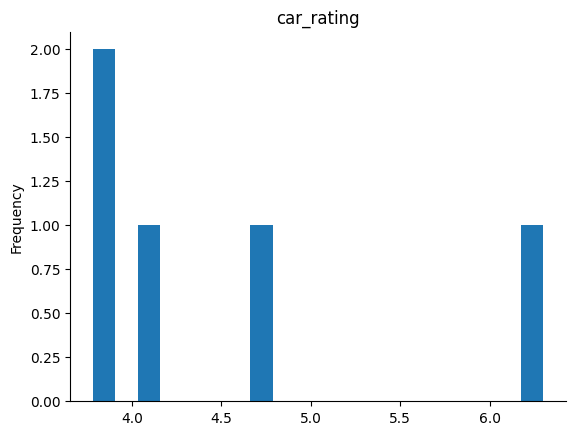

In [ ]:
from matplotlib import pyplot as plt
_df_0['car_rating'].plot(kind='hist', bins=20, title='car_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.query('model == "MINI CooperSE"').target_class.unique()

array(['break_bug', 'gear_stick', 'another_bug', 'engine_overheat',
       'engine_ignition', 'engine_check'], dtype=object)

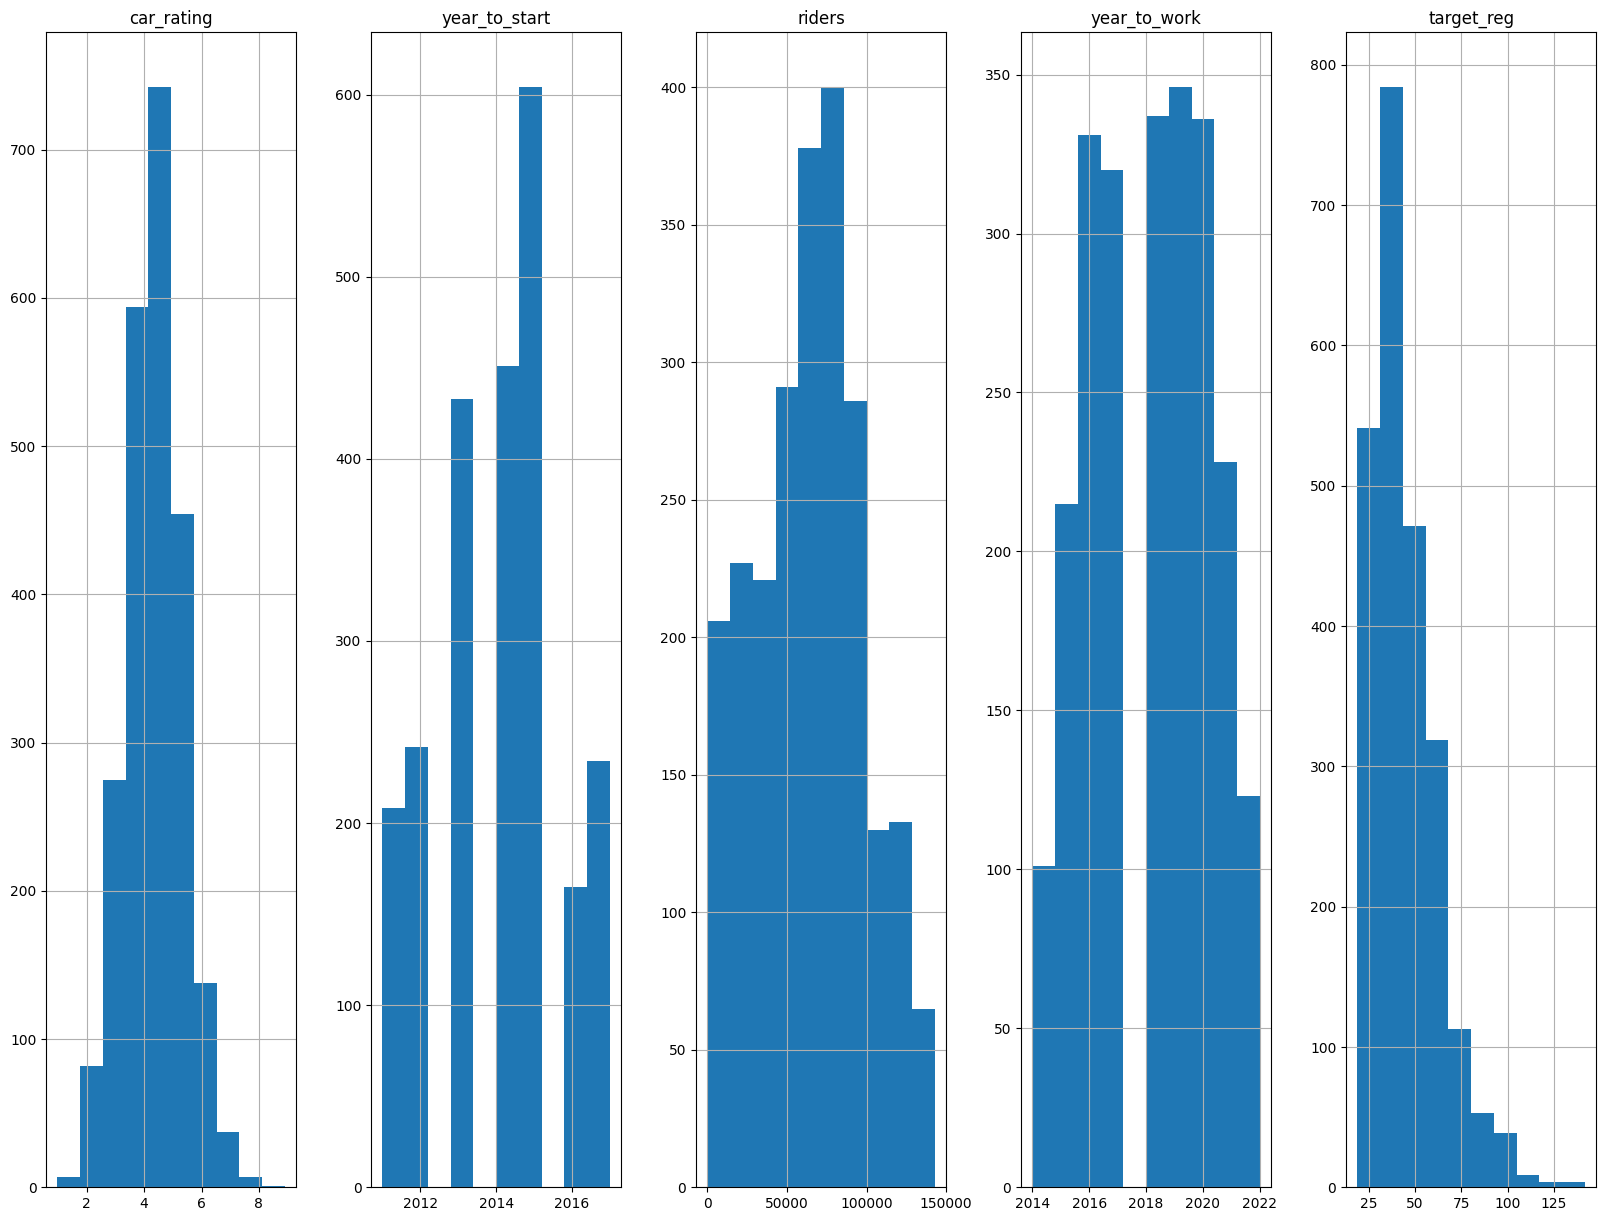

In [ ]:
df.hist(figsize=(20, 15), layout=(-1, 5));

In [ ]:
df.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel


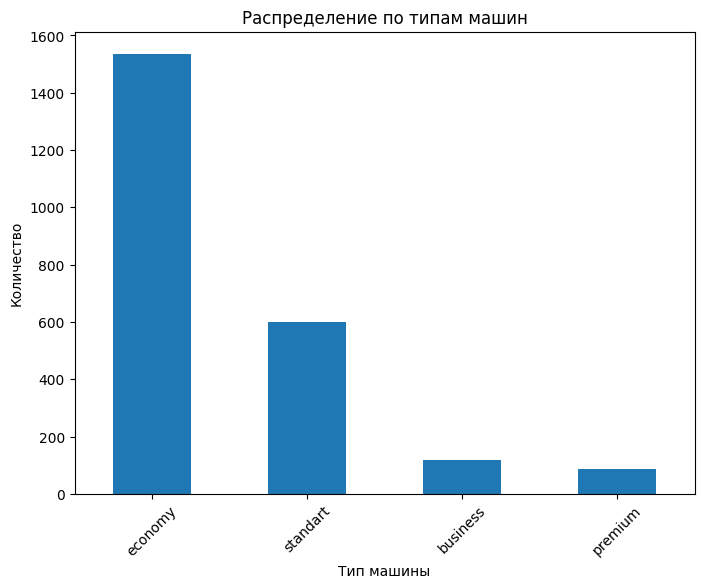

In [ ]:
# Подсчет количества уникальных значений в столбце 'тип_машины'
counts = df['car_type'].value_counts()

# Построение графика
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Распределение по типам машин')
plt.xlabel('Тип машины')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

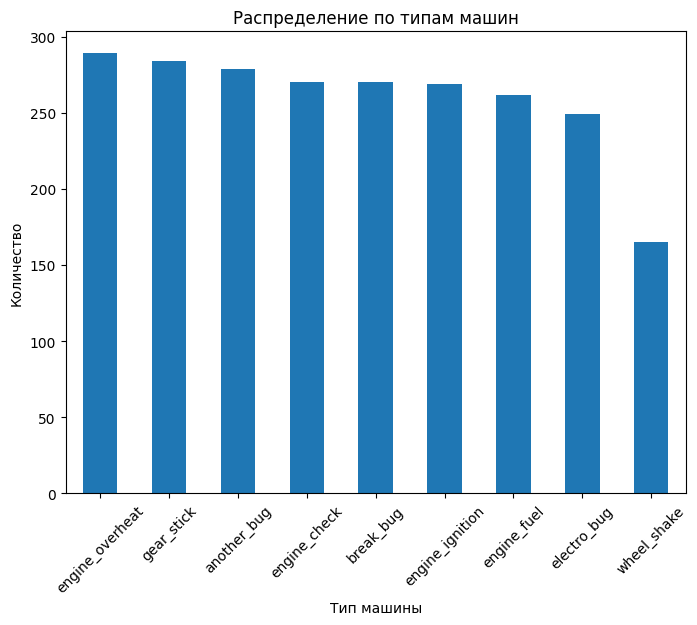

In [ ]:
counts = df['target_class'].value_counts()

# Построение графика
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Распределение по типам машин')
plt.xlabel('Тип машины')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

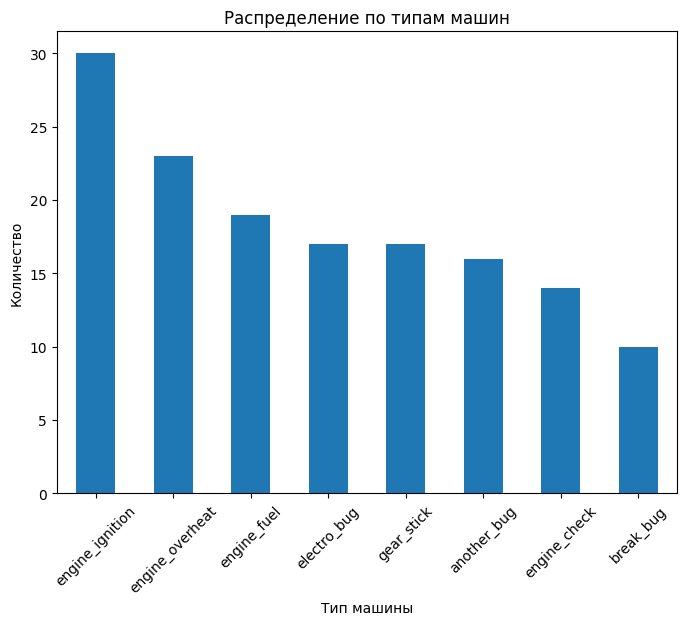

In [ ]:
counts = df.query("model == 'Nissan Qashqai'")['target_class'].value_counts()

# Построение графика
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Распределение по типам машин')
plt.xlabel('Тип машины')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

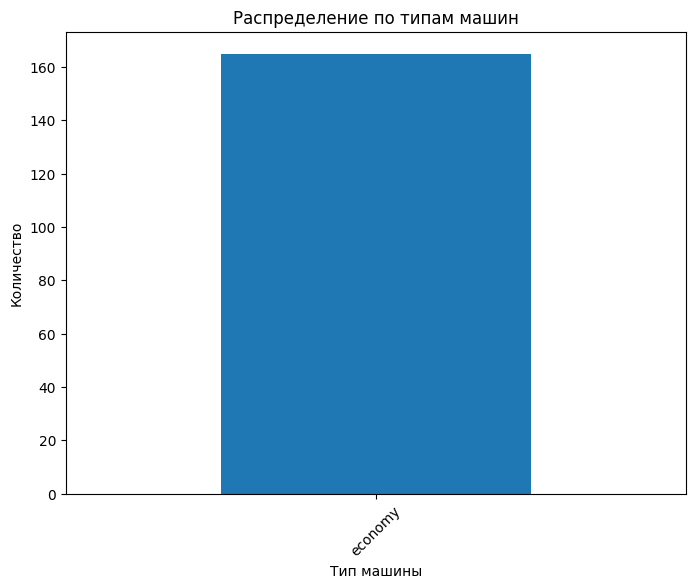

In [ ]:
counts = df.query("target_class == 'wheel_shake'")['car_type'].value_counts()

# Построение графика
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Распределение по типам машин')
plt.xlabel('Тип машины')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

In [ ]:
# Заполните словарь params верными параметрами и их значениями
# датасет rides_info уже записан в переменную rides_info

params = {'data' : rides_info,
          'kind' : 'scatter',
          'x' : 'rating',
          'y' : 'user_time_accident',
          'row' : '?',
          'size' : '?',
          'hue' : 'target_class',
          'aspect' : 4,
          'alpha' : 0.5}

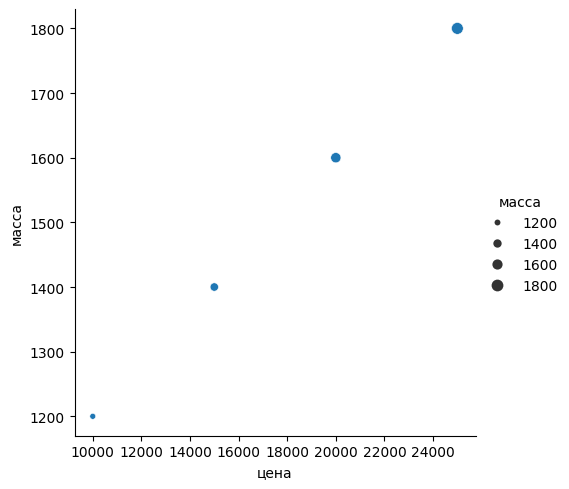

In [ ]:
import seaborn as sns
import pandas as pd

# Предположим, что ваш DataFrame называется df и содержит столбцы 'цена' и 'масса'
# Если вам нужно загрузить данные из файла, используйте pd.read_csv() или аналогичный метод

# Создание примерного DataFrame
data = {'цена': [10000, 15000, 20000, 25000],
        'масса': [1200, 1400, 1600, 1800]}
df = pd.DataFrame(data)

# Построение графика рассеяния с размером маркеров, зависящим от столбца 'масса'
sns.relplot(x='цена', y='масса', size='масса', data=df)


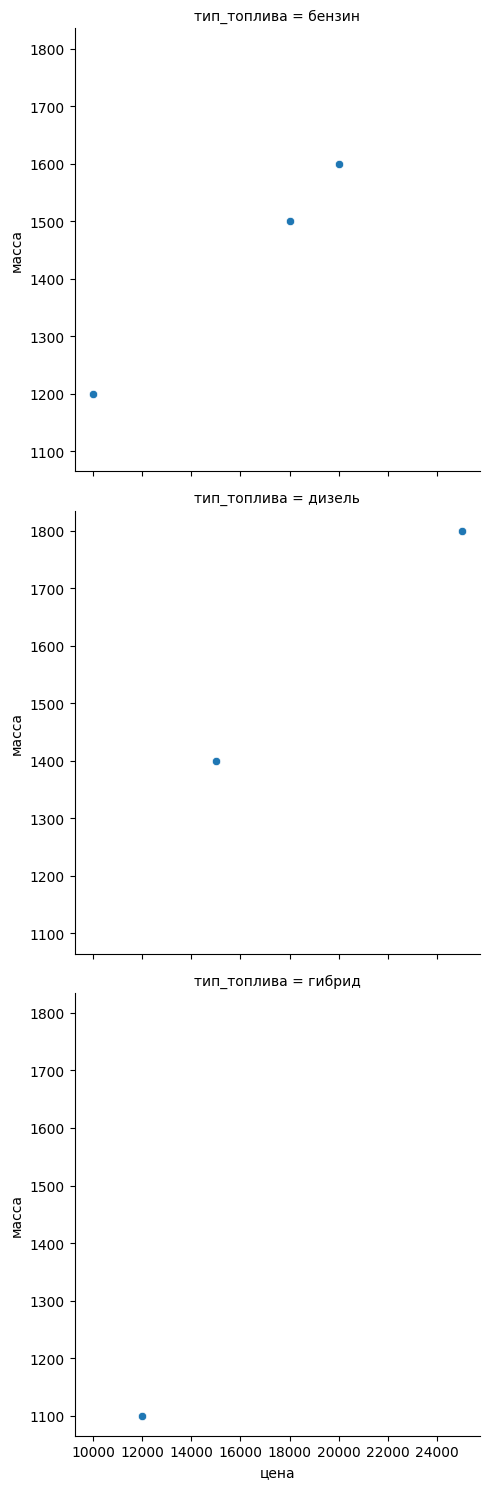

In [ ]:
import seaborn as sns
import pandas as pd

# Предположим, что ваш DataFrame называется df и содержит столбцы 'цена', 'масса' и 'тип_топлива'
# Если вам нужно загрузить данные из файла, используйте pd.read_csv() или аналогичный метод

# Создание примерного DataFrame
data = {'цена': [10000, 15000, 20000, 25000, 12000, 18000],
        'масса': [1200, 1400, 1600, 1800, 1100, 1500],
        'тип_топлива': ['бензин', 'дизель', 'бензин', 'дизель', 'гибрид', 'бензин']}
df = pd.DataFrame(data)

# Построение графика рассеяния с разделением по типу топлива
sns.relplot(x='цена', y='масса', row='тип_топлива', data=df)


In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779913/stratified_valid.csv')

In [ ]:
df.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN


In [ ]:
from sklearn.model_selection import LeaveOneOut, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
N = 10

skf = StratifiedKFold(n_splits=N, shuffle = True)
df['target_reg_group'] = pd.qcut(df['target_reg'], N, labels = [f'group_{i}' for i in range(N)])

fold_index = 0
y = df.target_reg_group
for train_index, test_index in skf.split(df, y):
    df.loc[test_index, 'num_fold'] = fold_index
    fold_index += 1


In [ ]:
df

,car_id,target_reg,num_fold,target_reg_group
0,y13744087j,9492.96,0.0,group_9
1,O41613818T,2656.23,2.0,group_5
2,d-2109686j,1526.11,5.0,group_3
3,u29695600e,1338.00,1.0,group_2
4,N-8915870N,825.72,5.0,group_1
...,...,...,...,...
2332,j21246192N,547.30,4.0,group_0
2333,h-1554287F,26414.19,2.0,group_9
2334,A15262612g,2677.95,5.0,group_5
2335,W-2514493U,2213.63,2.0,group_4


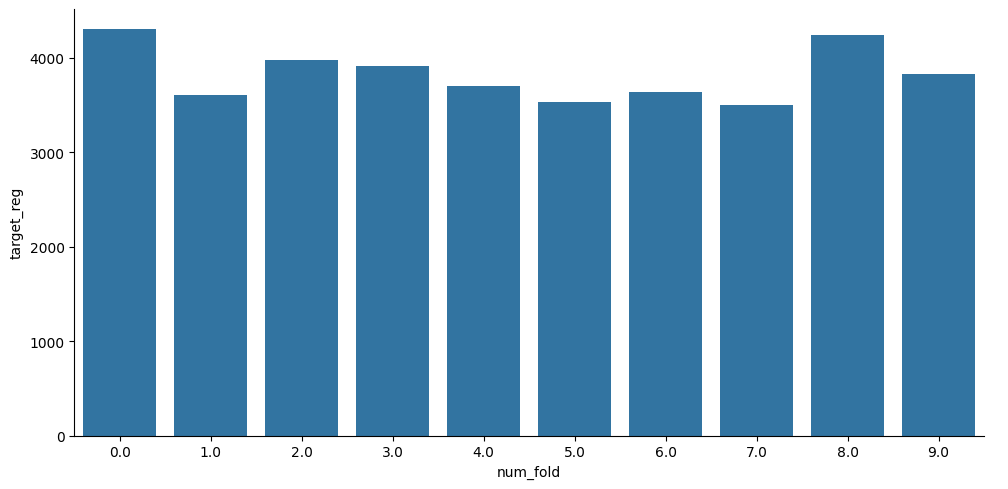

In [ ]:
tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [ ]:
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

284.34598115222866

In [ ]:
df.to_csv('/content/drive/MyDrive/Введение в соревновательный Data Science/src/file.csv', index=False)

In [ ]:
sample_submission = pd.read_csv('https://stepik.org/media/attachments/lesson/779913/sample_submission.csv')

In [ ]:
sample_submission.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,0
1,O41613818T,2656.23,0
2,d-2109686j,1526.11,0
3,u29695600e,1338.00,0
4,N-8915870N,825.72,0


In [ ]:
ans = df[sample_submission.columns]

In [ ]:
ans.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,0.0
1,O41613818T,2656.23,2.0
2,d-2109686j,1526.11,5.0
3,u29695600e,1338.00,1.0
4,N-8915870N,825.72,5.0


In [ ]:
ans.to_csv('/content/drive/MyDrive/Введение в соревновательный Data Science/src/file.csv', index=False)

In [ ]:
!pip install iterative-stratification

In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np

X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])

mskf = MultilabelStratifiedKFold(n_splits=2, shuffle=True, random_state=0)

for train_index, test_index in mskf.split(X, y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 3 4 6] TEST: [1 2 5 7]
TRAIN: [1 2 5 7] TEST: [0 3 4 6]


In [ ]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/779913/multi_label.csv")

In [ ]:
df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
y = df.drop('ID', axis=1)

In [ ]:
df['kfold'] = None

In [ ]:
df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science,kfold
0,9431,1,0,1,1,0,0,0,0,0,0,0,0,None
1,7960,1,1,0,1,0,0,0,0,0,0,0,1,None
2,8578,1,1,0,1,0,0,0,0,0,1,0,0,None
3,1651,1,0,1,1,0,0,0,0,0,0,0,0,None
4,4011,1,0,1,1,0,0,0,0,0,0,0,0,None


In [ ]:
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)

fold_index = 0
for train_index, test_index in mskf.split(df, y):
   df.loc[test_index, 'kfold'] = fold_index
   fold_index += 1

In [ ]:
df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science,kfold
0,9431,1,0,1,1,0,0,0,0,0,0,0,0,3
1,7960,1,1,0,1,0,0,0,0,0,0,0,1,4
2,8578,1,1,0,1,0,0,0,0,0,1,0,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0,1
4,4011,1,0,1,1,0,0,0,0,0,0,0,0,1


In [ ]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
tmp = df.groupby(['kfold'], as_index=False).sum()
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

0.3400211311688078


In [ ]:
df.to_csv('/content/drive/MyDrive/Введение в соревновательный Data Science/src/file.csv', index=False)